<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

# Carregamento das bibliotecas

In [ ]:
%pip install -q pingouin

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Criando o banco de dados

### Estabelecendo uma semente para a randomização

In [3]:
np.random.seed(321)

### Estabelecendo parâmetros para os dados que serão gerados

In [4]:
media_cachorro = 58
media_gato = 53
dp = 15
n_total = 500

### Gerando a randomização do grupo (gato ou cachorro)

In [5]:
grupo = np.random.binomial(n = 1, p = 0.5, size = n_total)
# 0 = gato; 1 = cachorro

### Criando o escore de 0-100 após o vídeo

In [7]:
escore = (1-grupo)*np.random.normal(loc = media_gato,
                                    scale = dp, size = n_total) + grupo*np.random.normal(loc = media_cachorro, 
                                                                                         scale = dp, size = n_total)

### Unindo o escore e o grupo para criação do dataframe

In [8]:
df = pd.DataFrame(data = {'grupo': grupo, 'escore': escore})

# Análise descritiva do dataframe

In [9]:
df.head(10)

,grupo,escore
0,1,65.241132
1,0,18.154959
2,1,65.920449
3,0,43.837049
4,1,42.963910
5,1,55.555875
6,1,74.059254
7,1,47.558196
8,0,60.996206
9,1,80.871430


In [10]:
df.describe().round(2)

,grupo,escore
count,500.00,500.00
mean,0.49,56.31
std,0.50,15.73
min,0.00,14.31
25%,0.00,44.72
50%,0.00,56.22
75%,1.00,67.35
max,1.00,99.86


In [11]:
df.groupby('grupo').describe().round(2)

escore                                                 
       count   mean    std    min    25%    50%    75%    max
grupo                                                        
0      253.0  53.52  15.11  14.31  43.66  53.10  63.92  92.83
1      247.0  59.16  15.87  22.31  47.81  59.75  70.57  99.86

### Histograma por grupo

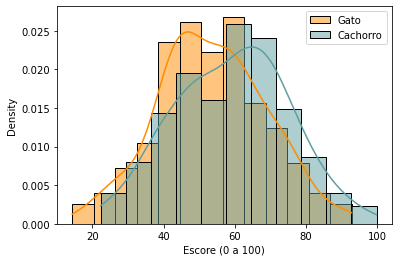

In [14]:
sns.histplot(df[df['grupo'] == 0]['escore'], label = 'Gato', stat = "density", color="darkorange", kde=True)
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Cachorro', stat = "density", color="cadetblue", kde=True)
plt.xlabel('Escore (0 a 100)')
plt.legend();

# Comparação entre os grupos por teste-t independente

Vamos comparar as médias dos escores dos dois grupos. São estatisticamente diferentes?

In [15]:
from scipy.stats import ttest_ind
# Importando a função que realiza o teste-t para amostras independentes

In [16]:
stat, p = ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

In [17]:
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-4.072, p=0.000


Estabelecendo o nível de significância como 5%, como p < 0,05, vamos considerar que há diferença entre os grupos.
Sabendo (pela análise descritiva) que a média do comercial com gatos é inferior à média do comercial com cachorros, podemos dizer que o comercial com cachorros induz a um escore de intenção de adoção estatisticamente superior ao comercial com gatos.

#### Outra opção: com a biblioteca pingouin (output mais completo)

In [19]:
import pingouin as pg

In [20]:
pg.ttest(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'], correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.071726,498,two-sided,0.000054,"[-8.36, -2.92]",0.364212,281.374,0.982306
